In [62]:
import openmeteo_requests
import requests_cache
import pandas as pd
import numpy as np
from retry_requests import retry
import calendar
from pprint import pprint
import matplotlib.pyplot as plt


In [63]:
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

In [81]:
url = "https://archive-api.open-meteo.com/v1/archive"
def get_mean_yearly_temperatures(lat, lon, year):

    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": f"{year}-01-01",
        "end_date": f"{year}-12-31",
        "daily": "temperature_2m_mean"
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]

    daily = response.Daily()
    daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()

    return daily_temperature_2m_mean

def get_max_yearly_temperatures(lat, lon, year):

    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": f"{year}-01-01",
        "end_date": f"{year}-12-31",
        "daily": "temperature_2m_max"
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]

    daily = response.Daily()
    daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()

    return daily_temperature_2m_max

In [65]:
def show_local_plot(yearly_data):
    # plot the weekly mean temperatures for each year
    _, ax = plt.subplots()
    for year, temperatures in yearly_data.items():
        days = len(temperatures)
        num_full_weeks = (days + 6) // 7
        padding_needed = num_full_weeks * 7 - days
        padded_temperatures = np.pad(temperatures, (0, padding_needed), mode='edge')
        weekly_means = np.mean(padded_temperatures.reshape(-1, 7), axis=1)
        ax.plot(weekly_means, label=year)

    ax.set_xlabel("Week number")
    ax.set_ylabel("Mean temperature (°C)")
    ax.legend()
    plt.show()

In [66]:
years_to_analyze = [1950, 2000, 2023]

Temperature change in Poland

In [67]:
poland_lat = 52.24
poland_lon = 20.99

yearly_temperatures_poland = {}
for year in years_to_analyze:
    yearly_temperatures_poland[year] = get_mean_yearly_temperatures(poland_lat, poland_lon, year)

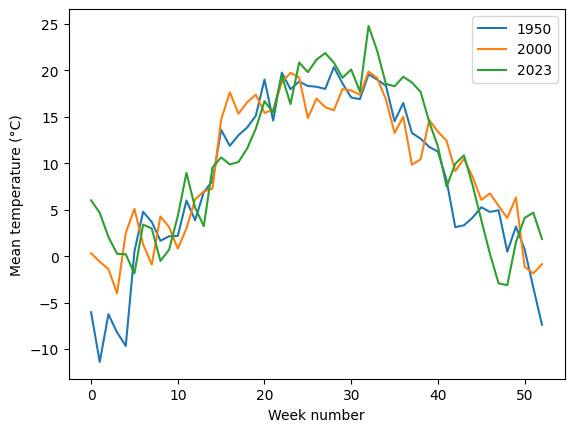

In [68]:
show_local_plot(yearly_temperatures_poland)


China yearly temperatures

In [69]:
china_lat = 31.28
china_lon = 121.47

yearly_temperatures_china = {}
for year in years_to_analyze:
    yearly_temperatures_china[year] = get_mean_yearly_temperatures(china_lat, china_lon, year)

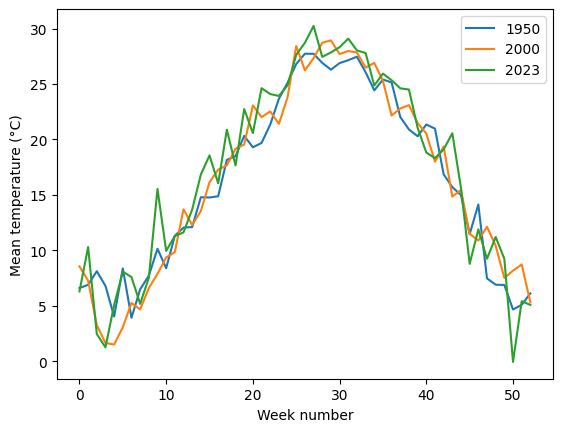

In [70]:
show_local_plot(yearly_temperatures_china)

Sudan yearly temperatures

In [71]:
# lat lon from 15.595088767068598, 32.533749922756265 to 2 places
sudan_lat = 15.59
sudan_lon = 32.53

yearly_temperatures_sudan = {}
for year in years_to_analyze:
    yearly_temperatures_sudan[year] = get_mean_yearly_temperatures(sudan_lat, sudan_lon, year)

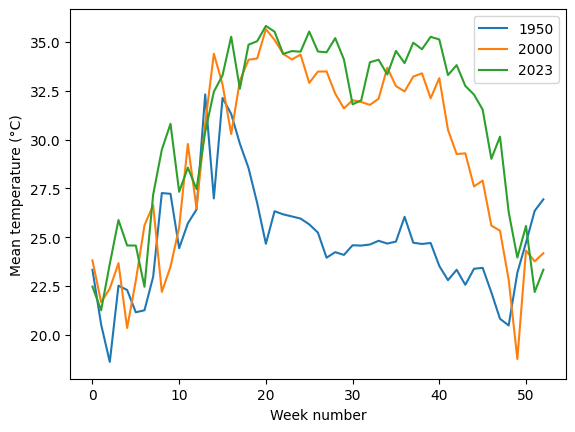

In [72]:
show_local_plot(yearly_temperatures_sudan)

Brazil yearly temperatures

In [73]:
brazil_lat = -22.95
brazil_lon = -43.21

yearly_temperatures_brazil = {}
for year in years_to_analyze:
    yearly_temperatures_brazil[year] = get_mean_yearly_temperatures(brazil_lat, brazil_lon, year)

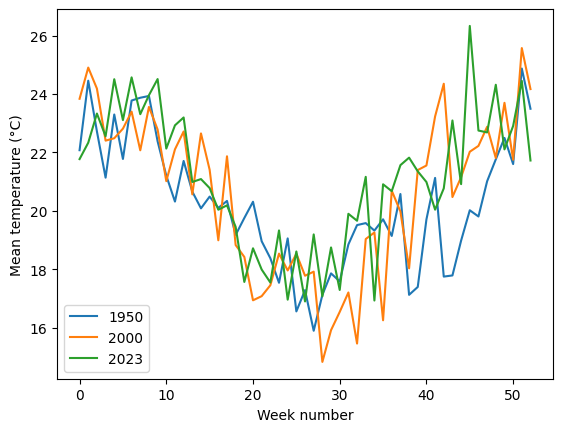

In [74]:
show_local_plot(yearly_temperatures_brazil)

Warsaw yearly mean temperatures increase from 1950 to 2023

In [75]:
warsaw_lat = 52.24
warsaw_lon = 21.01

yearly_temperatures_warsaw = {}
for year in range(1950, 2024):
    yearly_temperatures_warsaw[year] = get_mean_yearly_temperatures(warsaw_lat, warsaw_lon, year)

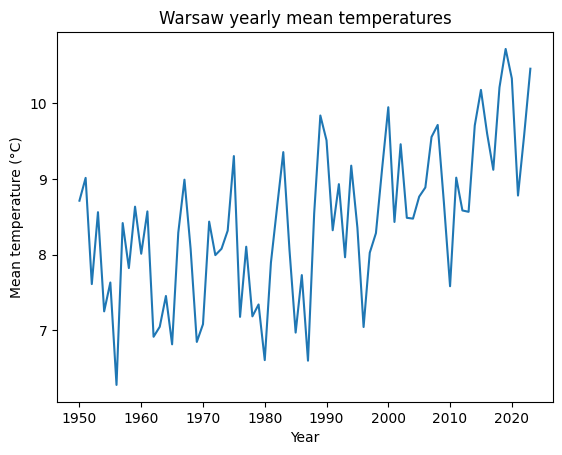

In [79]:
yearly_mean_temperatures_warsaw = {year: np.mean(temps) for year, temps in yearly_temperatures_warsaw.items()}
_, ax = plt.subplots()
ax.plot(yearly_mean_temperatures_warsaw.keys(), yearly_mean_temperatures_warsaw.values())
ax.set_xlabel("Year")
ax.set_ylabel("Mean temperature (°C)")
ax.set_title("Warsaw yearly mean temperatures")
plt.show()


Los Angeles yearly mean temperatures increase from 1950 to 2023

In [78]:
la_lat = 34.05
la_lon = -118.24

yearly_temperatures_la = {}
for year in range(1950, 2024):
    yearly_temperatures_la[year] = get_mean_yearly_temperatures(la_lat, la_lon, year)

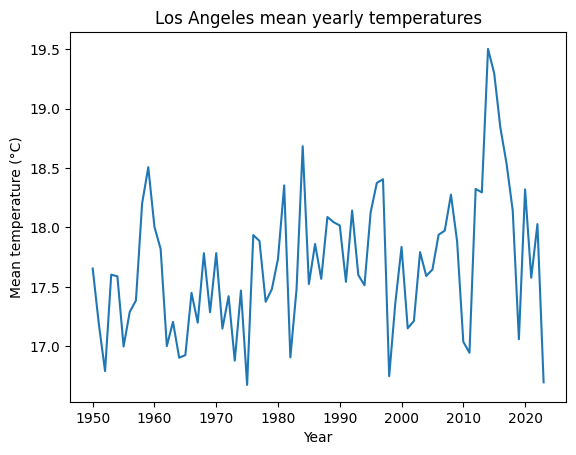

In [80]:
yearly_mean_temperatures_la = {year: np.mean(temps) for year, temps in yearly_temperatures_la.items()}
_, ax = plt.subplots()
ax.plot(yearly_mean_temperatures_la.keys(), yearly_mean_temperatures_la.values())
ax.set_xlabel("Year")
ax.set_ylabel("Mean temperature (°C)")
ax.set_title("Los Angeles mean yearly temperatures")
plt.show()

Los Angles yearly max temperatures from 1950 to 2023

In [82]:
la_lat = 34.05
la_lon = -118.24

yearly_max_temperatures_la = {}
for year in range(1950, 2024):
    yearly_max_temperatures_la[year] = get_max_yearly_temperatures(la_lat, la_lon, year)

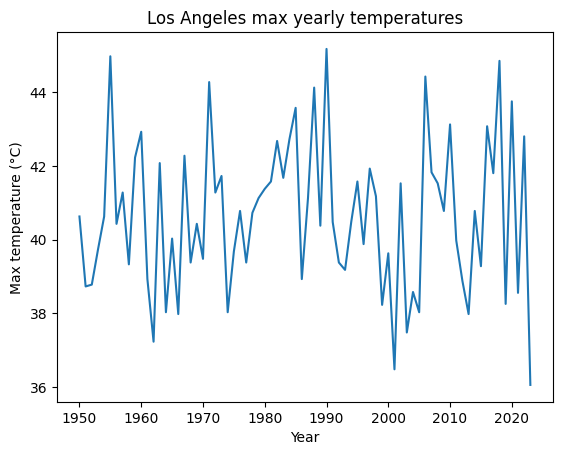

In [84]:
yearly_max_temperatures_la = {year: np.max(temps) for year, temps in yearly_max_temperatures_la.items()}
_, ax = plt.subplots()
ax.plot(yearly_max_temperatures_la.keys(), yearly_max_temperatures_la.values())
ax.set_xlabel("Year")
ax.set_ylabel("Max temperature (°C)")
ax.set_title("Los Angeles max yearly temperatures")
plt.show()